<a href="https://colab.research.google.com/github/lima-breno/time_series/blob/main/TS_05_Estacionarias_previsao_mediaPadaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Séries temporais estacionárias: prevsião pela média

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares, bem como a aplicação do modelo de previsão pela média dos valores conhecidos.

Data da última atualização: 17/02/2025

#### Preliminares

In [1]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [3]:
# Leitura do arquivo de dados

MinhaSerieTemporal = pd.read_csv('HistoricoVendasPadaria.csv', index_col = 0)

In [4]:
# Exibição do DataFrame

MinhaSerieTemporal

,Vendas
Data,
2024-02-04,52
2024-02-05,20
2024-02-06,34
2024-02-07,31
2024-02-08,36
...,...
2025-01-28,31
2025-01-29,31
2025-01-30,41


In [5]:
# Ajuste do índice para formato DateTime

MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

<Axes: xlabel='Data'>

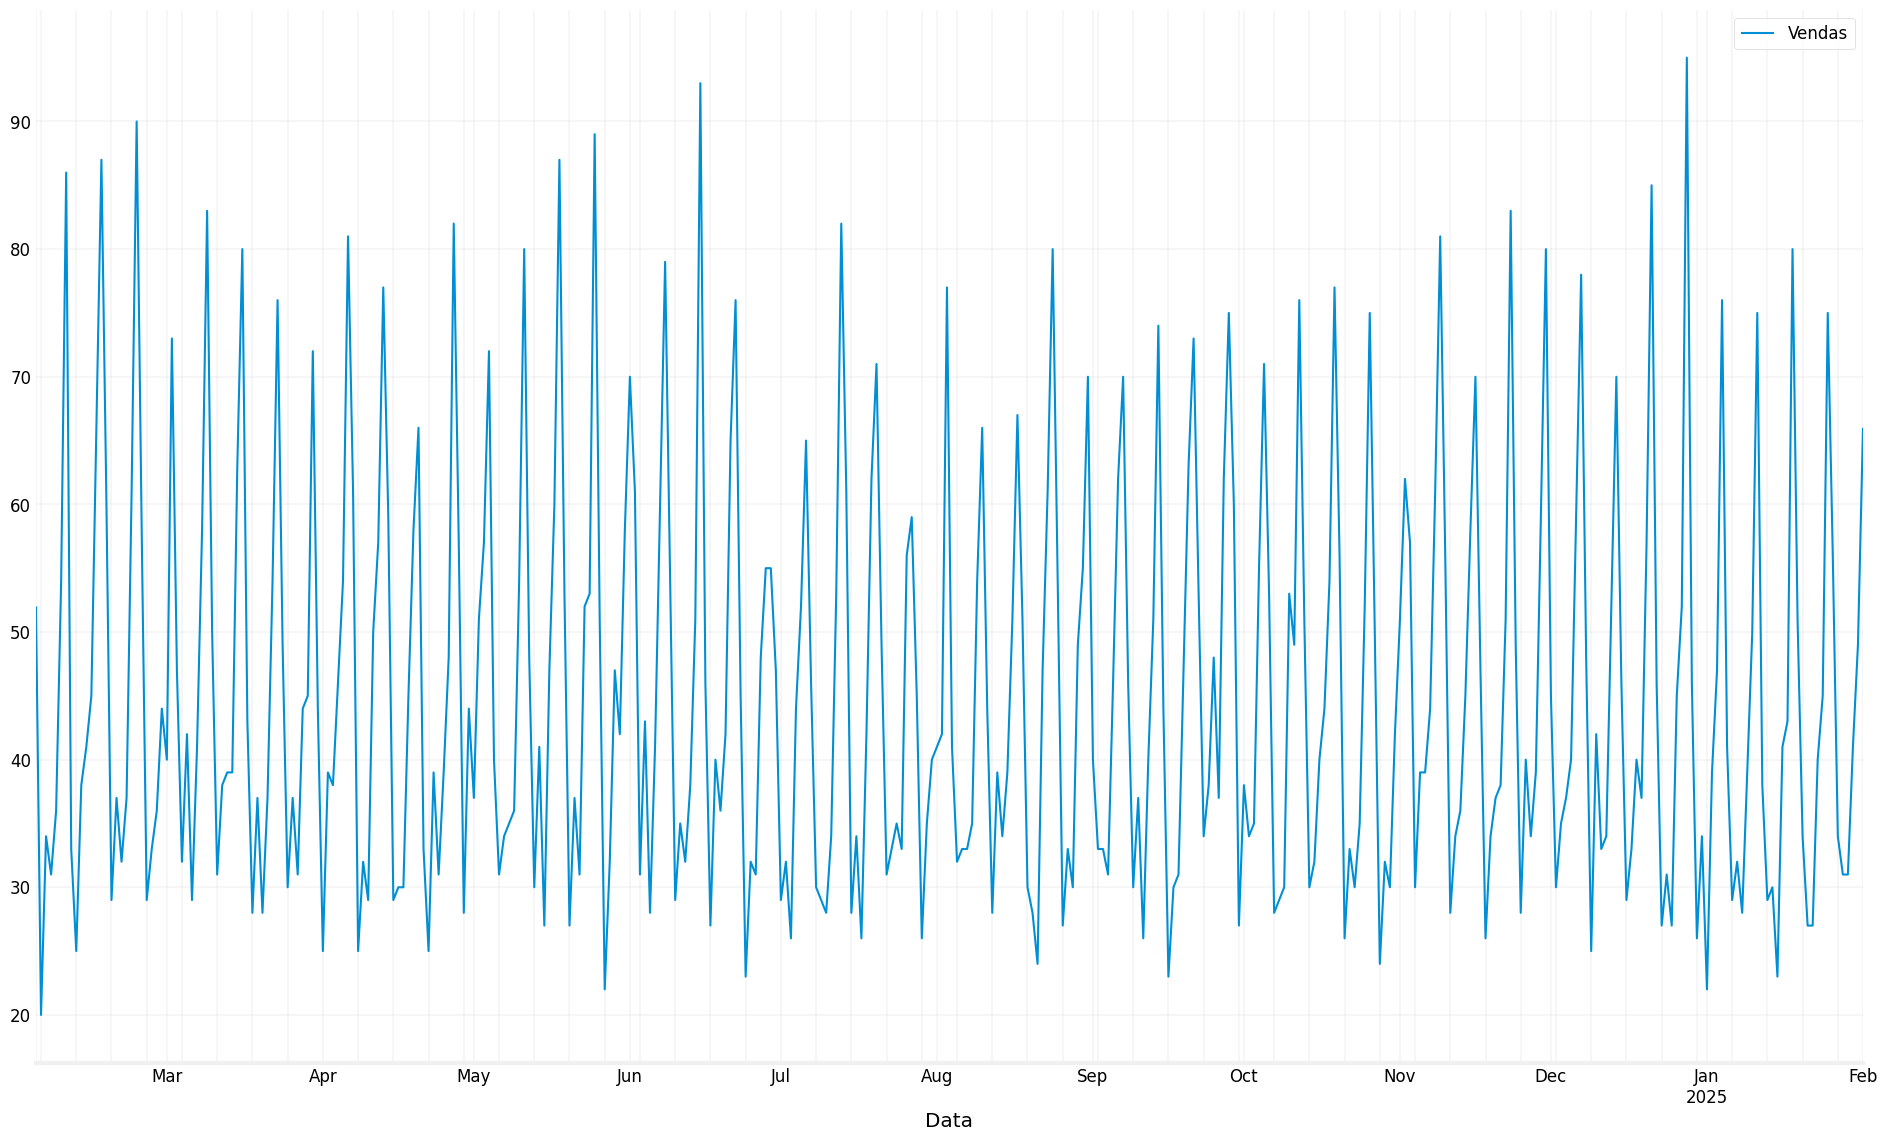

In [6]:
# Gráfico
MinhaSerieTemporal.plot()

#### Decomposição da Série

In [7]:
# Decomposição aditiva da série temporal

PeriodoSazonal = 7     # Sazonalidade semanal

Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = PeriodoSazonal)

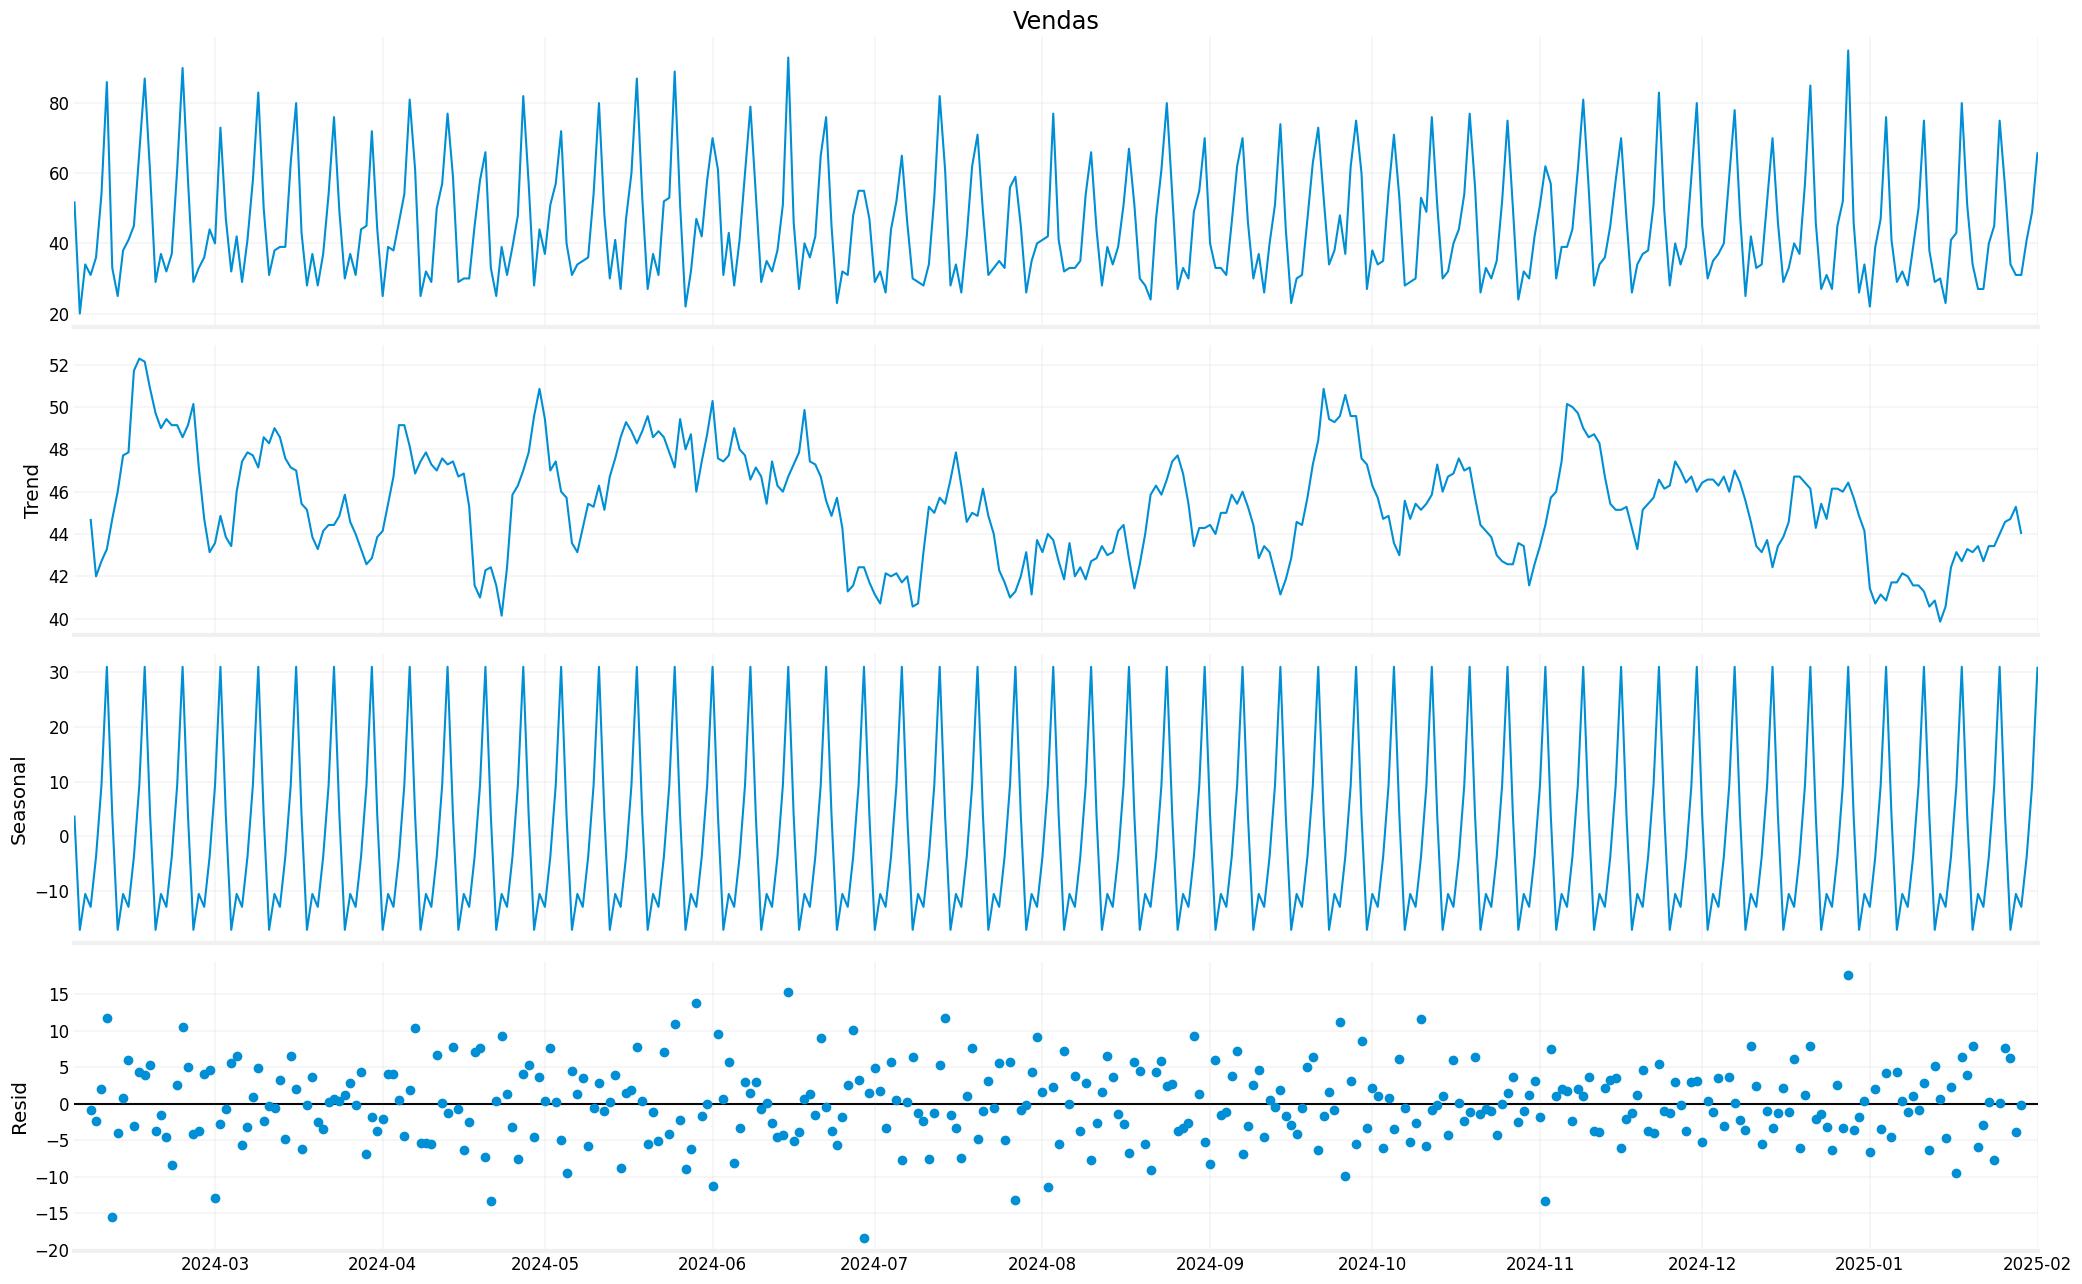

In [8]:
Decomposicao.plot();

#### Teste ADF

In [9]:
# Teste ADF para estacionariedade

ad_fuller_result = adfuller(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]])

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -4.1514
p-value:          0.0795 %


In [10]:
# Teste ADF para estacionariedade para a série das diferenças finitas de ordem escolhida

OrdemDif = 1

ad_fuller_result = adfuller(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif))

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -9.9963
p-value:          0.0000 %


#### Funcão de autocorrelação

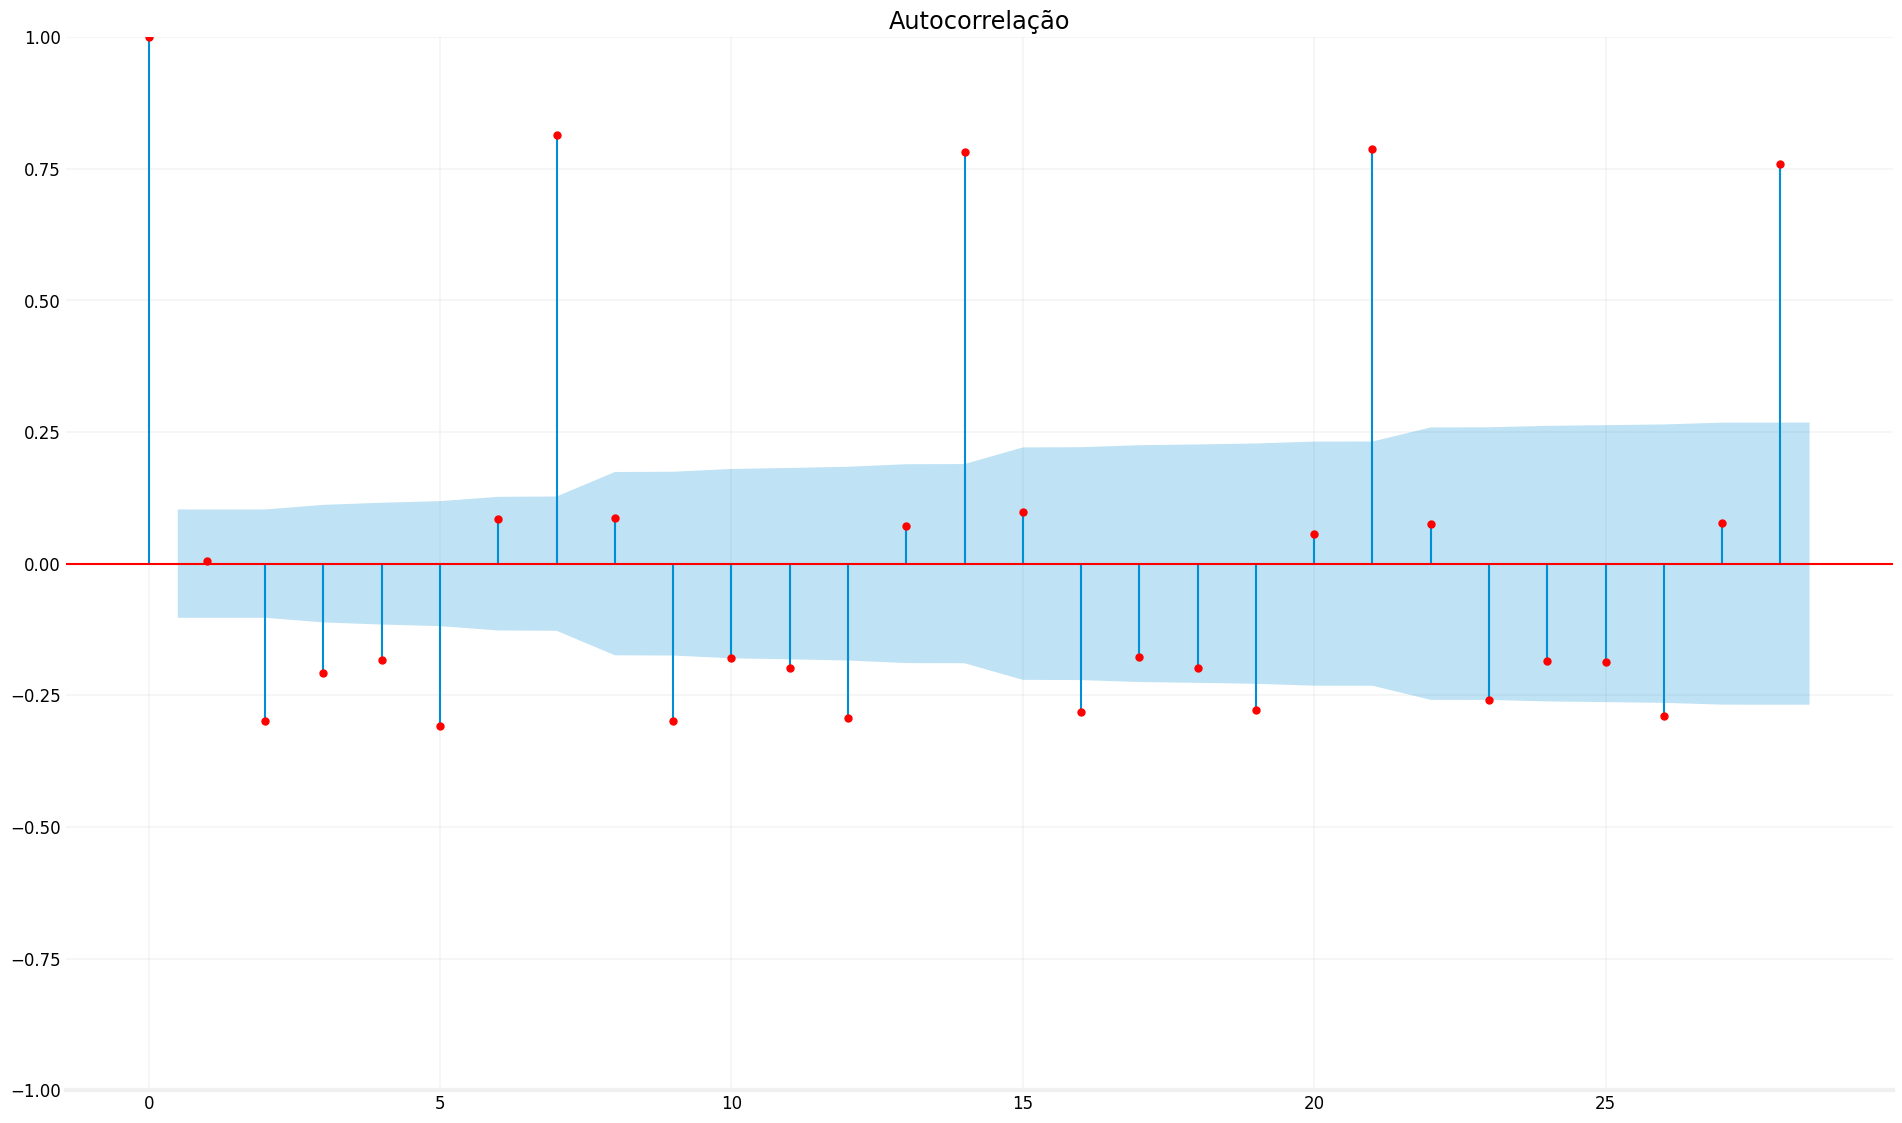

In [11]:
# Função de correlação para série temporal

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=28, title = "Autocorrelação", color="red");

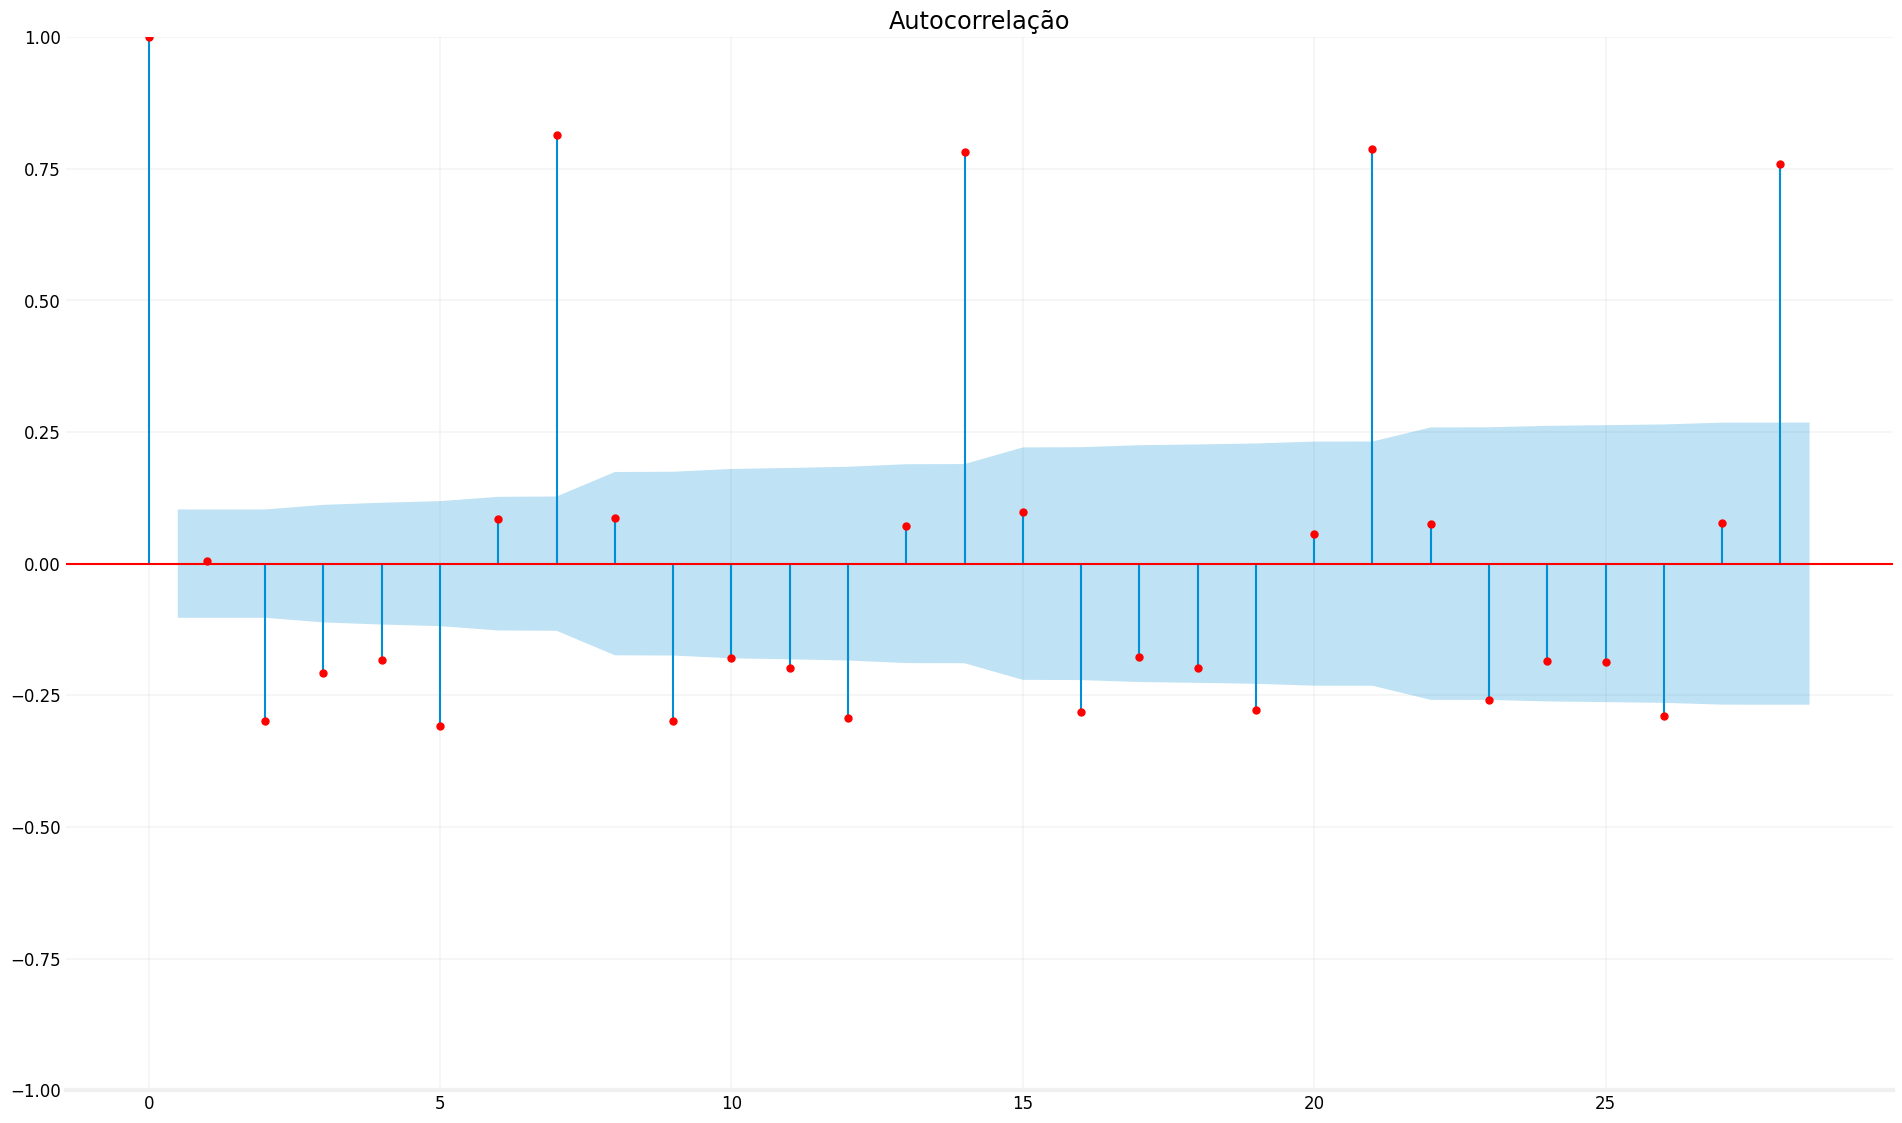

In [12]:
# Função de correlação para série das diferenças finitas da ordem escolhida acima

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=28, title = "Autocorrelação", color="red");

#### Separação das bases de treino e teste

In [13]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

In [14]:
# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

<Axes: xlabel='Data'>

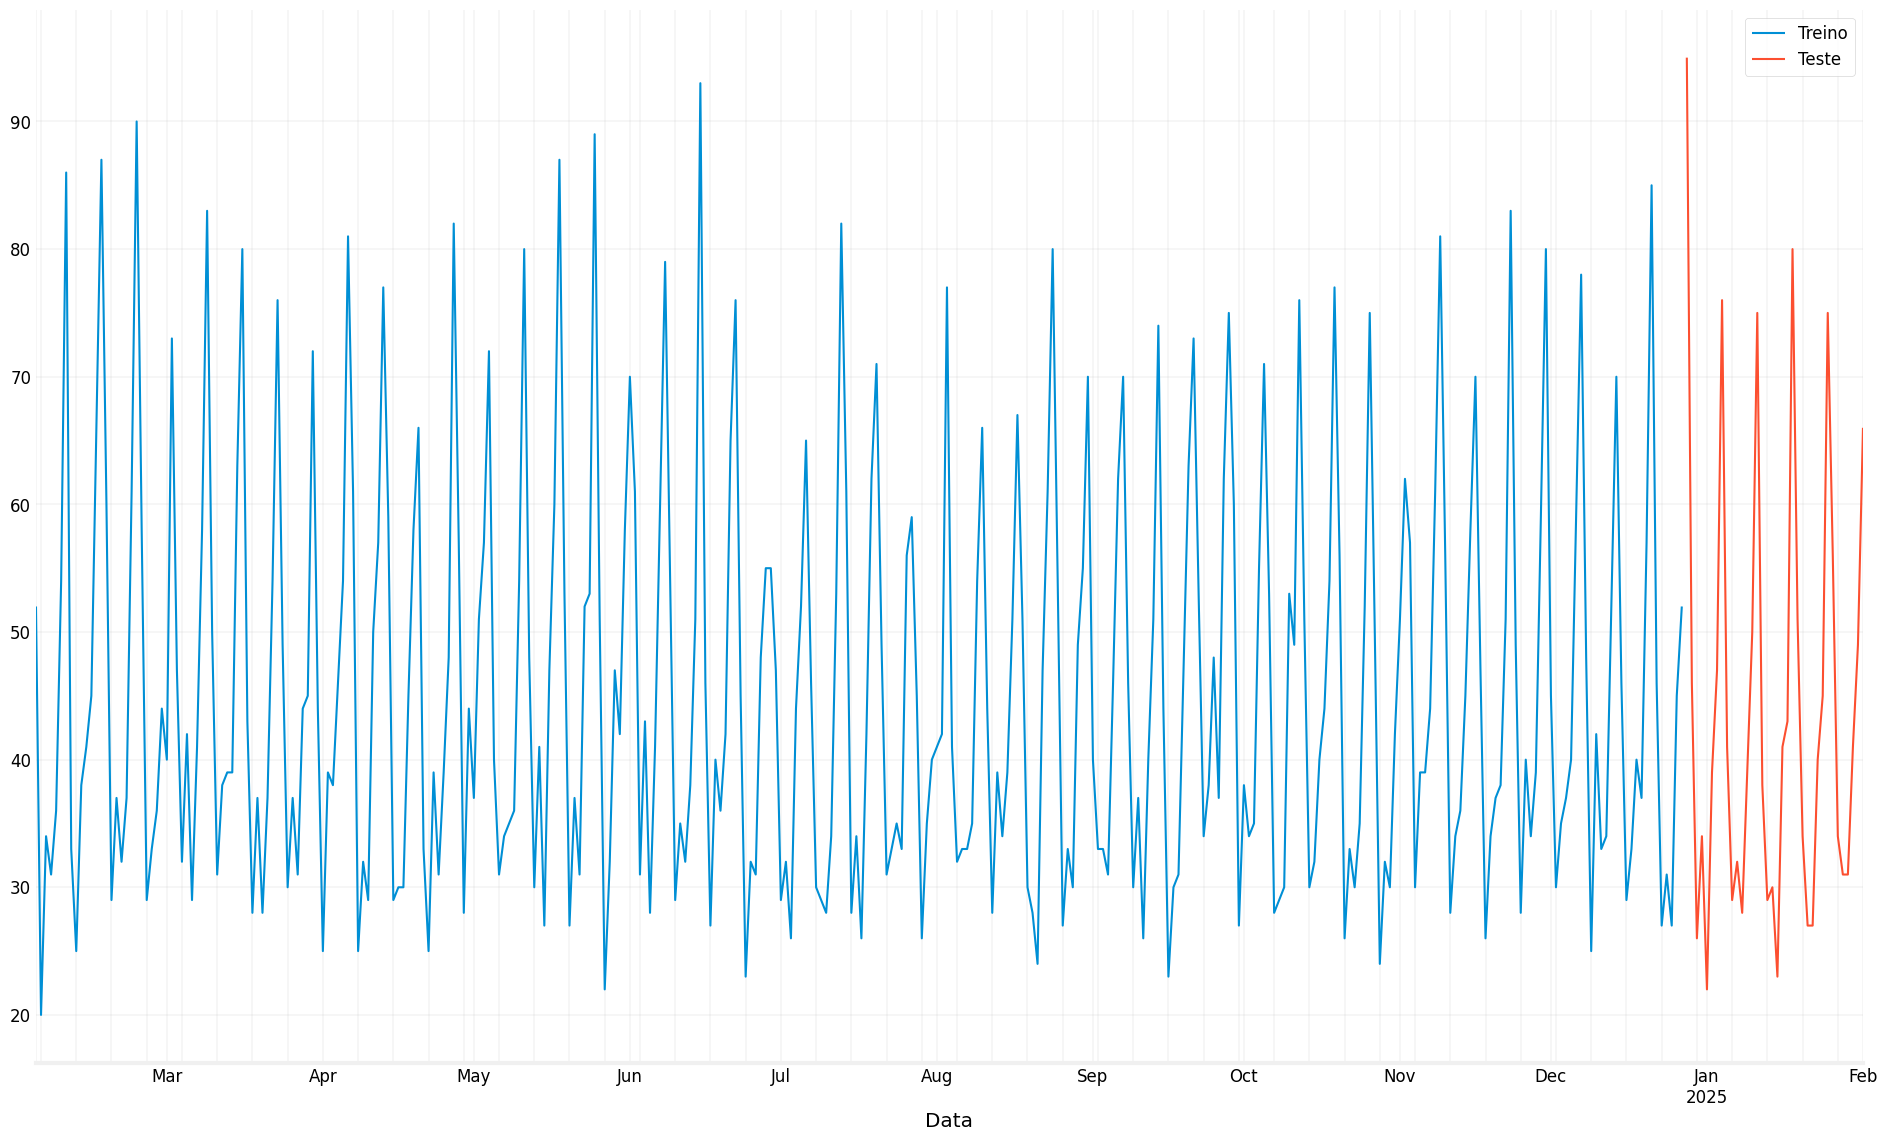

In [15]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pela média

In [16]:
# Cálculo da média dos valores da série temporal na base de treino

MediaTreino = TreinoDF['Treino'].mean()

In [17]:
# Montagem do DataFrame de previsão

PrevisoesDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
PrevisoesDF['Previsão'] = MediaTreino * np.ones(len(PrevisoesDF.index))

<Axes: xlabel='Data'>

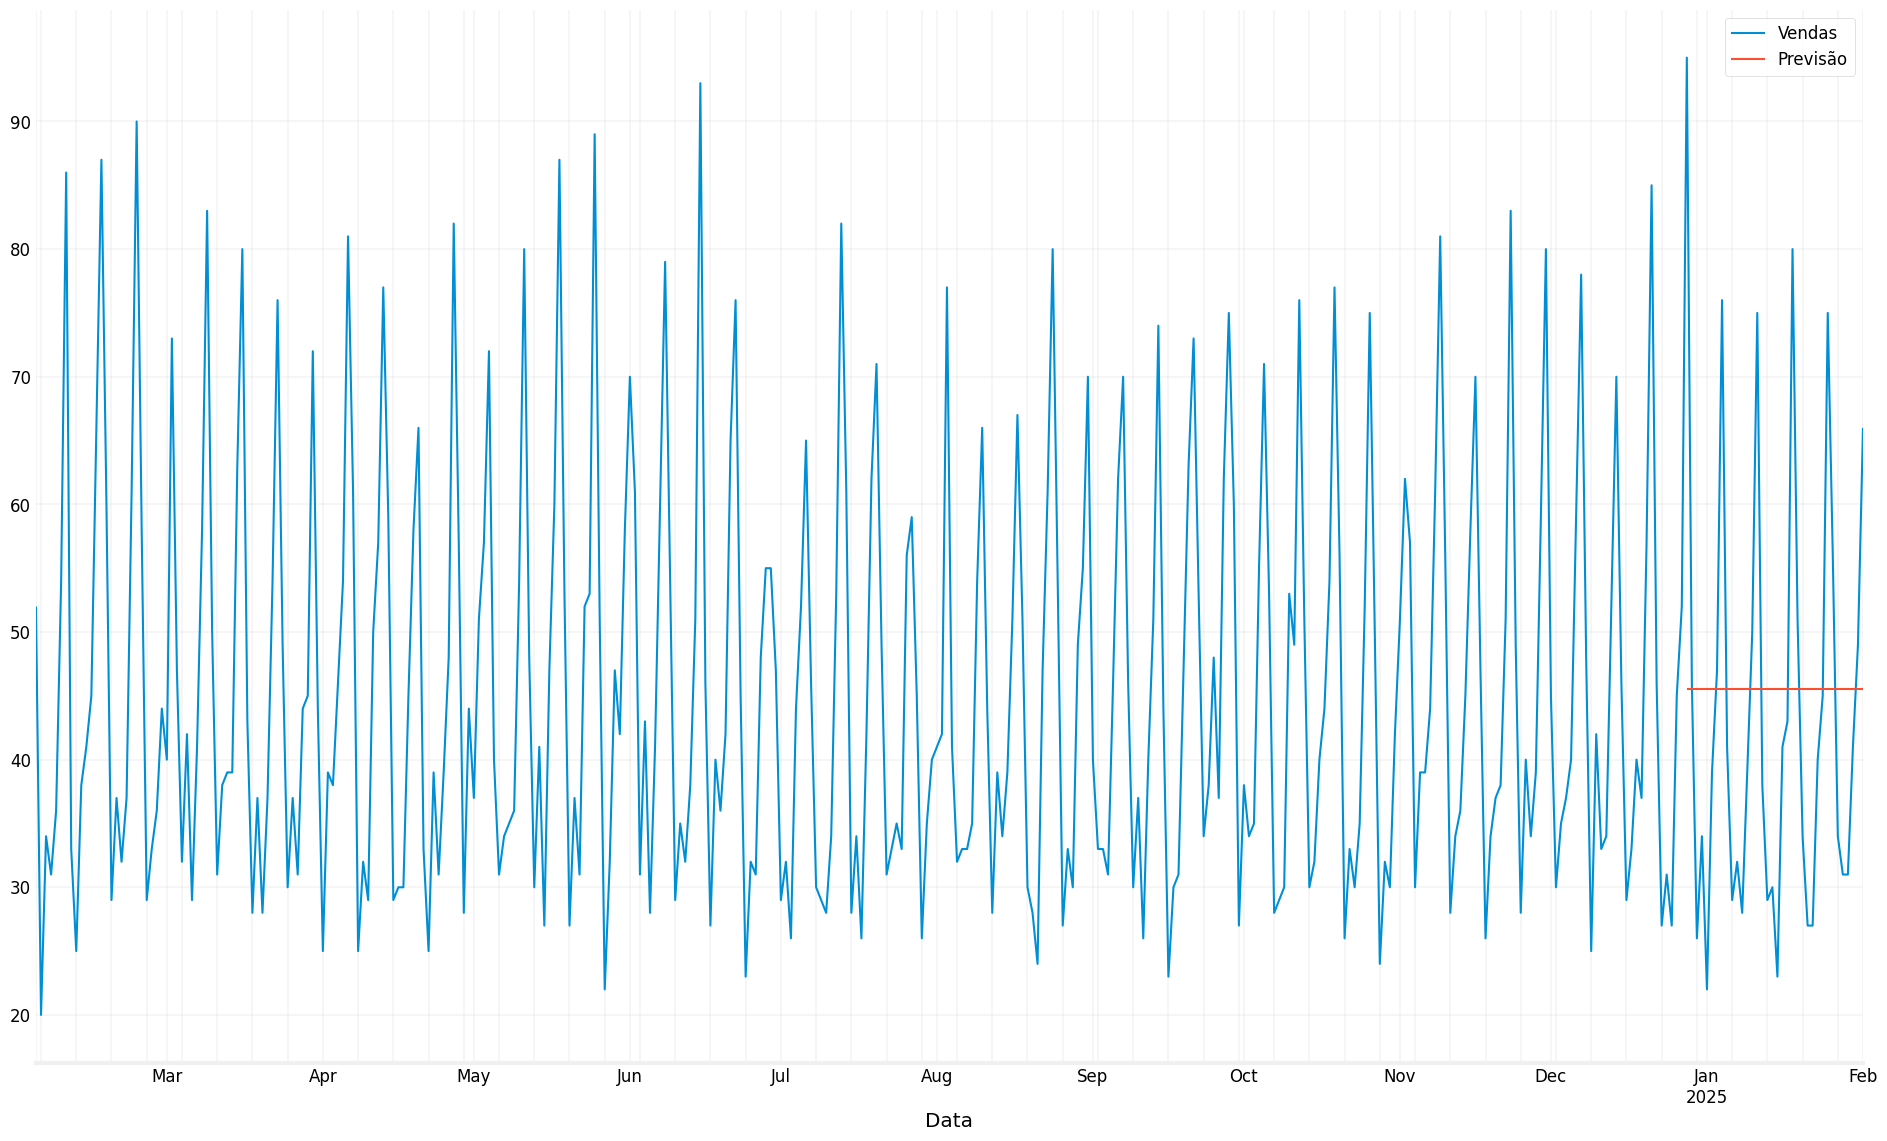

In [18]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([MinhaSerieTemporal,PrevisoesDF], axis = 1).plot()

#### Medidas de erro

In [19]:
# Cáluclo do vetor de erros

Erros = PrevisoesDF['Previsão'].values - TesteDF['Teste'].values
Erros

array([-49.50304878,  -0.50304878,  19.49695122,  11.49695122,
        23.49695122,   6.49695122,  -1.50304878, -30.50304878,
         4.49695122,  16.49695122,  13.49695122,  17.49695122,
         6.49695122,  -4.50304878, -29.50304878,   7.49695122,
        16.49695122,  15.49695122,  22.49695122,   4.49695122,
         2.49695122, -34.50304878,  -5.50304878,  11.49695122,
        18.49695122,  18.49695122,   5.49695122,   0.49695122,
       -29.50304878, -10.50304878,  11.49695122,  14.49695122,
        14.49695122,   4.49695122,  -3.50304878, -20.50304878])

In [20]:
# Cálculo do erro médio
ErroMedio = Erros.mean()

In [21]:
# Cálculo do erro absoluto médio
MAE = np.abs(Erros).mean()

In [22]:
# Cálculo da raiz do erro quadrático médio
RMSE = np.sqrt((Erros**2).mean())

In [23]:
# Cálculo dos erros relativos
ErrosRelativos = Erros / TesteDF['Teste'].values
ErrosRelativos

array([-0.52108472, -0.01093584,  0.74988274,  0.33814562,  1.06804324,
        0.16658849, -0.03197976, -0.40135591,  0.10968174,  0.56886039,
        0.42177973,  0.62489111,  0.16658849, -0.09006098, -0.39337398,
        0.19728819,  0.56886039,  0.51656504,  0.97812831,  0.10968174,
        0.05806863, -0.43128811, -0.10790292,  0.33814562,  0.68507227,
        0.68507227,  0.13742378,  0.01104336, -0.39337398, -0.18755444,
        0.33814562,  0.46764359,  0.46764359,  0.10968174, -0.07149079,
       -0.31065225])

In [24]:
# Cálculo do erro percentual absoluto médio
MAPE = np.abs(ErrosRelativos).mean()

In [25]:
print(f'Medidas de erro de previsão')
print()
print(f'Modelo de previsão: média dos valores conhecidos')
print()
print(f'Erro médio: {ErroMedio: 2.1f}')
print(f'MAE:        {MAE: 2.1f}')
print(f'RMSE:       {RMSE: 2.1f}')
print(f'MAPE:       {MAPE*100: 2.1f} %')

Medidas de erro de previsão

Modelo de previsão: média dos valores conhecidos

Erro médio:  1.9
MAE:         14.1
RMSE:        17.8
MAPE:        35.6 %
